# Knock airport Weather

### assignment_6_Weather.ipynb

![knock](img/knockweather_%2020241214_210223.jpg)

***

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


Plot:

The temperature
The mean temperature each day
The mean temperature for each month

## Libraries

***

We use pandas for the dataFrame data structure.

It allows to investigate [CSV](https://pandas.pydata.org/docs/user_guide/10min.html) files, amongst other features.

[matplotlib](https://www.w3schools.com/python/matplotlib_pyplot.asp) is theplotting library in python that serves as a 
visualization utility.

[NumPy](https://www.w3schools.com/python/numpy/default.asp) to help us working with arrays.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load data and clean dataset

***

#### Load the weather data from URL.

In [44]:
# Load the dataset
df = pd.read_csv('./hly4935.csv', skiprows=23, low_memory=False)

# Remove invalid date entries (optional: inspect for common issues)
df['date'] = df['date'].str.strip()  # Remove extra spaces
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M:%S', errors='coerce')

# Drop rows with unparseable dates
df = df.dropna(subset=['date'])


# Rename and clean relevant columns based on your mapping
column_mapping = {
    'date': 'date',
    'temp': 'temperature',
    # Include other columns you want to clean or use
}
df.rename(columns=column_mapping, inplace=True)

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Drop rows with invalid dates or missing temperatures
df = df.dropna(subset=['date', 'temperature'])

# Set the date as the index for easy resampling
df.set_index('date', inplace=True)


#### Ensure Numerical Columns are Cleaned
***

In [41]:
# Clean numerical columns
numerical_columns = ['temperature']  # Add other relevant columns as needed
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing temperature
df = df.dropna(subset=numerical_columns)


## Plot:

The temperature

The mean temperature each day

The mean temperature for each month

***

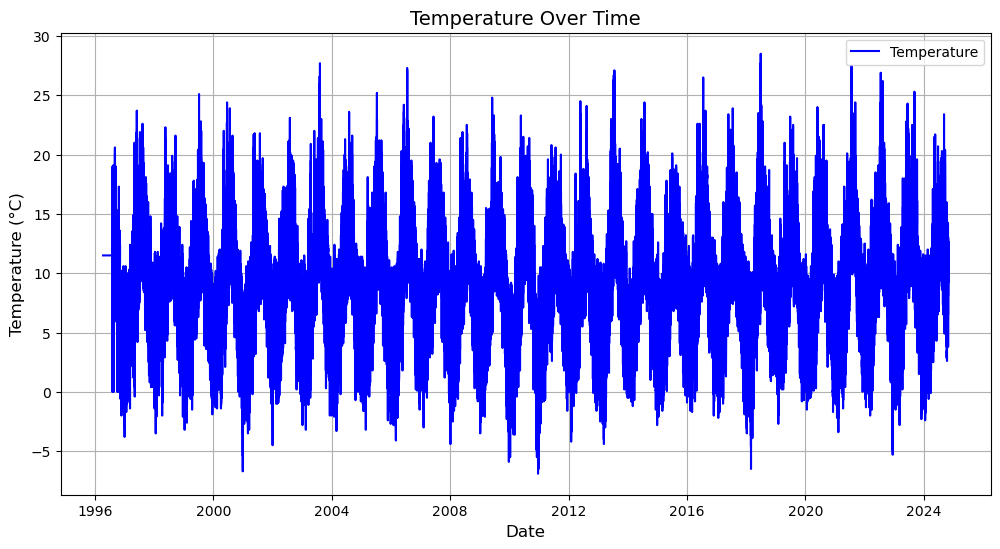

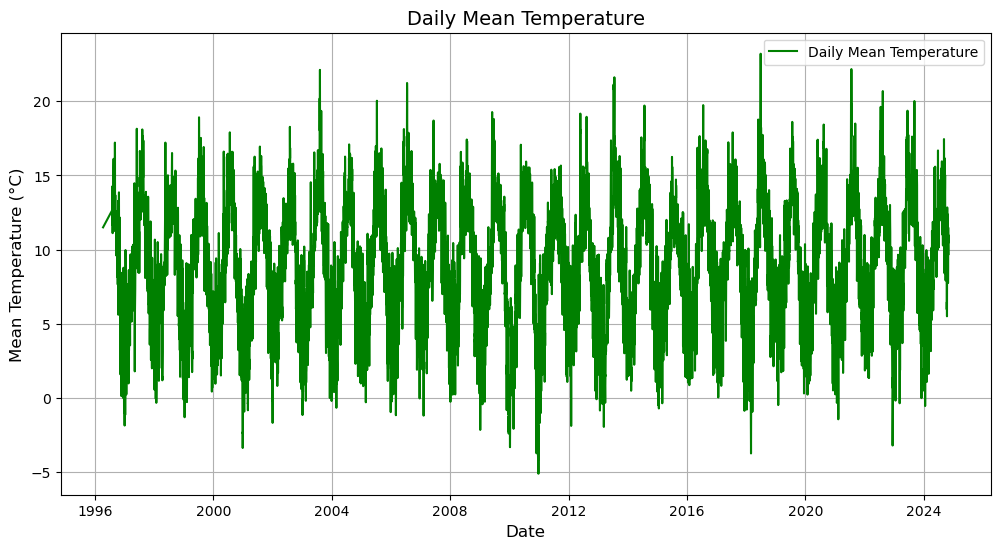

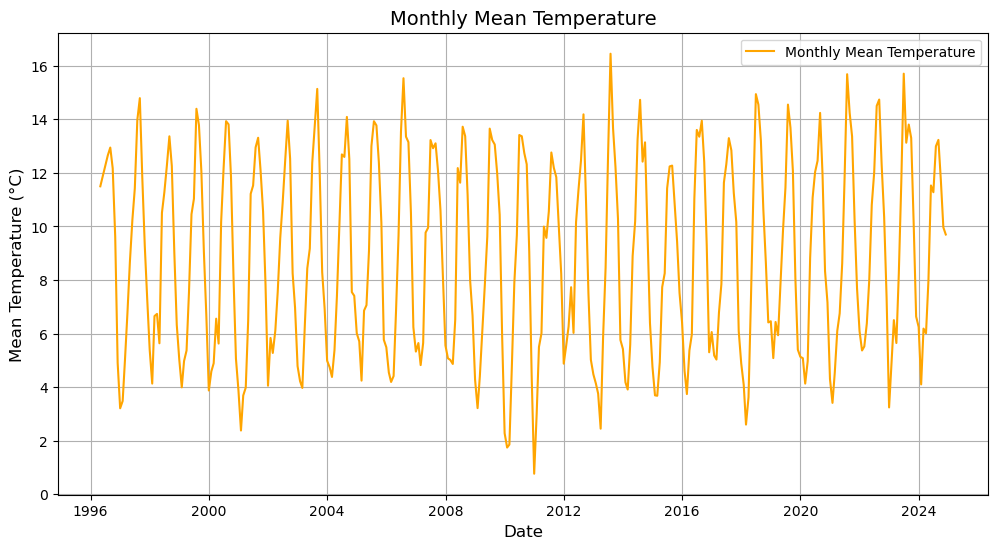

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = r'.\data\hly4935.csv'
df = pd.read_csv(file_path, skiprows=23, na_values=["", " ", "NA", "N/A", "-", "null"])

# Convert 'date' to datetime with the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')

# Clean 'temp'
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')

# Drop rows with missing values in key columns
df = df.dropna(subset=['date', 'temp'])

# Set 'date' as the index
df.set_index('date', inplace=True)

# Plot 1: Temperature over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='temp', color='blue', label='Temperature')
plt.title('Temperature Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Daily mean temperature
daily_mean_temp = df['temp'].resample('D').mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_mean_temp, color='green', label='Daily Mean Temperature')
plt.title('Daily Mean Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Monthly mean temperature
monthly_mean_temp = df['temp'].resample('ME').mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_mean_temp, color='orange', label='Monthly Mean Temperature')
plt.title('Monthly Mean Temperature', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## Plot:

The Windspeed (there is data missing from this column)

The rolling windspeed (say over 24 hours)

The max windspeed for each day

The monthly mean of the daily max windspeeds

***

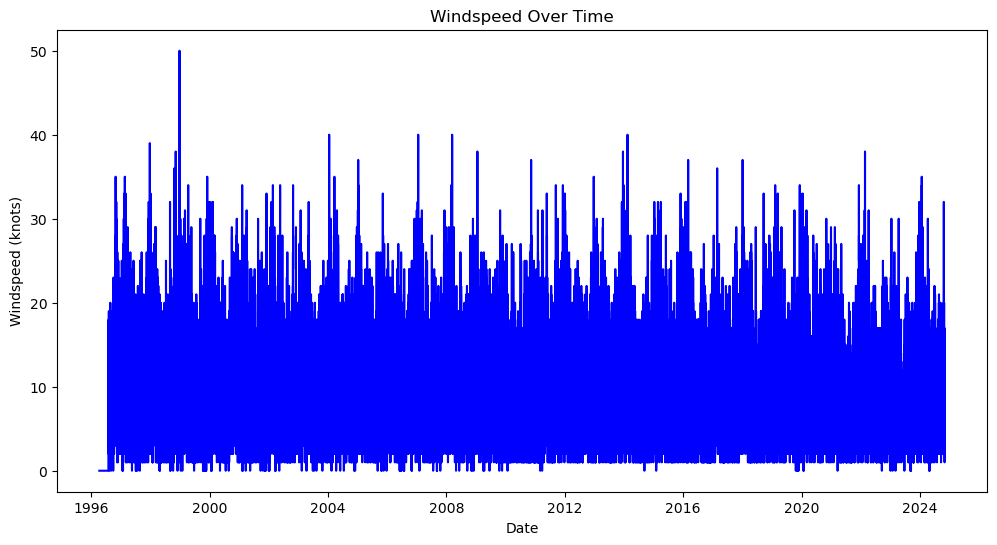

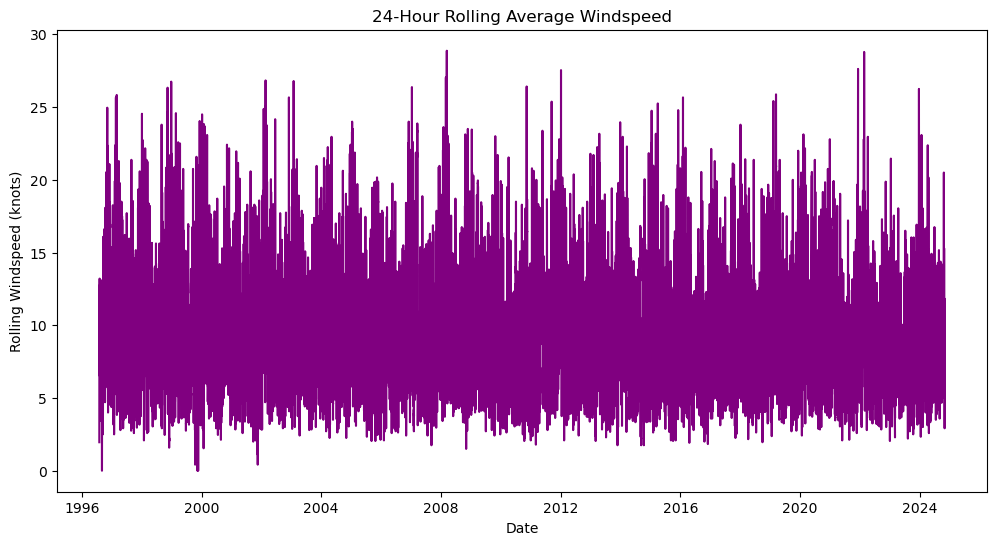

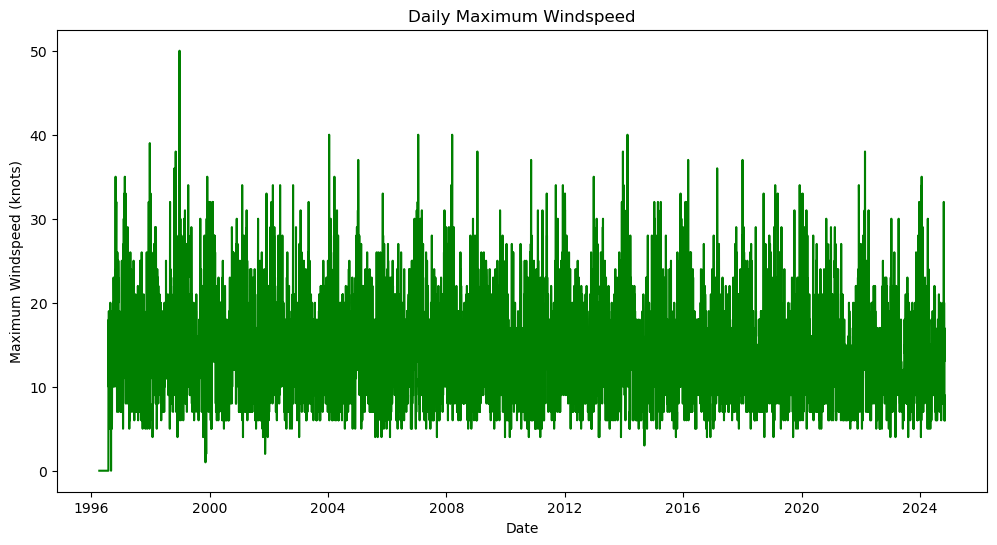

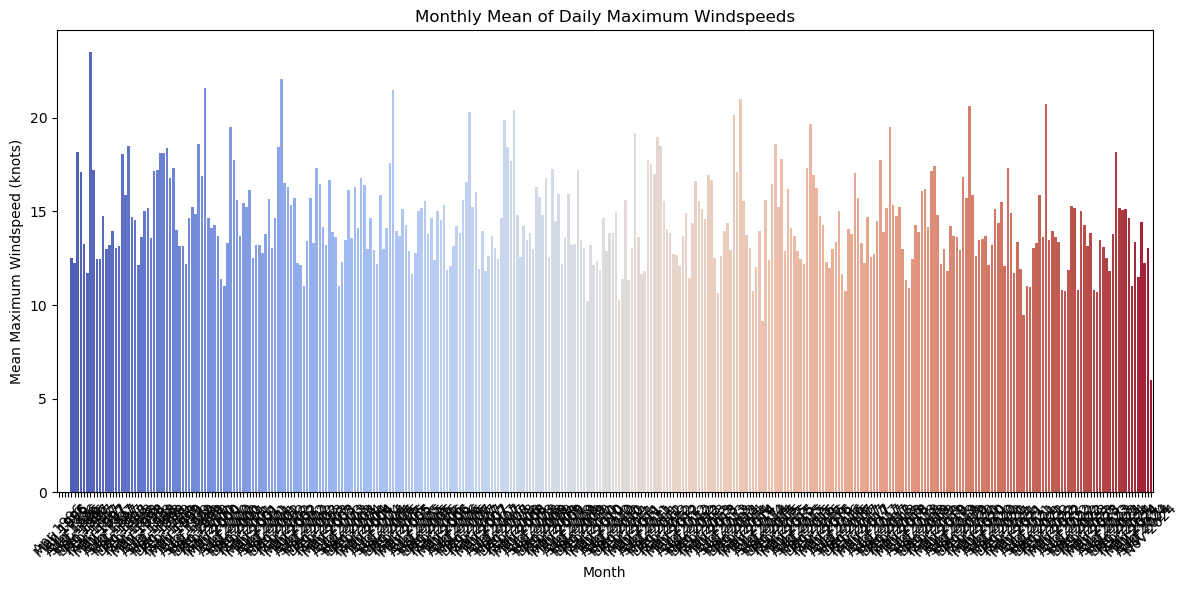

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
file_path = r'.\data\hly4935.csv'
df = pd.read_csv(file_path, skiprows=23, low_memory=False)  # Suppress DtypeWarning

# Convert 'date' column to datetime and set it as the index
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M', errors='coerce')
df.set_index('date', inplace=True)

# Convert 'wdsp' (windspeed) to numeric, handling missing values
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df['wdsp'] = df['wdsp'].ffill()  # Forward fill missing values

# Plot 1: Windspeed over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['wdsp'], color='blue')
plt.title('Windspeed Over Time')
plt.xlabel('Date')
plt.ylabel('Windspeed (knots)')
plt.show()

# Plot 2: Rolling Windspeed (24 hours)
df['rolling_wdsp'] = df['wdsp'].rolling(window=24).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['rolling_wdsp'], color='purple')
plt.title('24-Hour Rolling Average Windspeed')
plt.xlabel('Date')
plt.ylabel('Rolling Windspeed (knots)')
plt.show()

# Plot 3: Daily Maximum Windspeed
daily_max_wdsp = df['wdsp'].resample('D').max()
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_max_wdsp.index, y=daily_max_wdsp, color='green')
plt.title('Daily Maximum Windspeed')
plt.xlabel('Date')
plt.ylabel('Maximum Windspeed (knots)')
plt.show()

# Plot 4: Monthly Mean of Daily Maximum Windspeeds
monthly_mean_max_wdsp = daily_max_wdsp.resample('ME').mean()  # Use 'ME' instead of 'M'
plt.figure(figsize=(12, 6))
sns.barplot(
    x=monthly_mean_max_wdsp.index.strftime('%b %Y'), 
    y=monthly_mean_max_wdsp, 
    palette='coolwarm', 
    hue=monthly_mean_max_wdsp.index.strftime('%b %Y'),  # Assign x to hue
    dodge=False  # Ensure bars are not separated by hue
)
plt.xticks(rotation=45)
plt.title('Monthly Mean of Daily Maximum Windspeeds')
plt.xlabel('Month')
plt.ylabel('Mean Maximum Windspeed (knots)')
plt.legend([], [], frameon=False)  # Disable legend
plt.tight_layout()
plt.show()



## End

***